In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

## Read the training dataset

In [ ]:

train_data = pd.read_table("thrombin.data",sep=",")


In [3]:
train_data.shape

(1908, 139352)

## Read the Test dataset

In [4]:
test_data = pd.read_table("Thrombin.testset.data",sep=",")

In [5]:
test_data.shape

(633, 139352)

## Data Preprocessing

In [6]:

train_data.isnull().values.any(axis = 1).sum()
test_data.isnull().values.any(axis = 1).sum()



0

## Assigning the feature names to the Train and Test dataframes

In [7]:
features = []

for i in range(0,139352):
    i = str(i)
    features.append('f'+i)
#print(features)

features[0] = 'activity'

print(features[0])

activity


In [8]:
# Assigning the features to the Train dataframe

train_data.columns = features
test_data.columns = features



In [9]:
train_data.describe

<bound method NDFrame.describe of      activity  f1  f2  f3  f4  f5  f6  f7  f8  f9   ...     f139342  f139343  \
0           I   0   0   0   0   0   0   0   0   0   ...           0        0   
1           I   0   0   0   0   0   0   0   0   0   ...           0        0   
2           I   0   0   0   0   0   0   0   0   0   ...           0        0   
3           I   0   0   0   0   0   0   0   0   0   ...           0        0   
4           I   0   0   0   0   0   0   0   0   0   ...           0        0   
5           I   0   0   0   0   0   0   0   0   0   ...           0        0   
6           I   0   0   0   0   0   0   0   0   0   ...           0        0   
7           I   0   0   0   0   0   0   0   0   0   ...           0        0   
8           I   0   0   0   0   0   0   0   0   0   ...           0        0   
9           I   0   0   0   0   0   0   0   0   0   ...           0        0   
10          I   0   0   0   0   0   0   0   0   0   ...           0        0   
11    

In [10]:
test_data.describe

<bound method NDFrame.describe of     activity  f1  f2  f3  f4  f5  f6  f7  f8  f9   ...     f139342  f139343  \
0          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
1          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
2          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
3          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
4          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
5          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
6          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
7          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
8          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
9          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
10         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
11         ?   0  

In [11]:
test_data.replace("?","NA")

activity  f1  f2  f3  f4  f5  f6  f7  f8  f9   ...     f139342  f139343  \
0         NA   0   0   0   0   0   0   0   0   0   ...           0        0   
1         NA   0   0   0   0   0   0   0   0   0   ...           0        0   
2         NA   0   0   0   0   0   0   0   0   0   ...           0        0   
3         NA   0   0   0   0   0   0   0   0   0   ...           0        0   
4         NA   0   0   0   0   0   0   0   0   0   ...           0        0   
5         NA   0   0   0   0   0   0   0   0   0   ...           0        0   
6         NA   0   0   0   0   0   0   0   0   0   ...           0        0   
7         NA   0   0   0   0   0   0   0   0   0   ...           0        0   
8         NA   0   0   0   0   0   0   0   0   0   ...           0        0   
9         NA   0   0   0   0   0   0   0   0   0   ...           0        0   
10        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
11        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
12        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
13        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
14        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
15        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
16        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
17        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
18        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
19        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
20        NA   0   0   1   1   0   0   1   1   0   ...           0        0   
21        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
22        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
23        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
24        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
25        NA   0   1   1   0   0   1   1   0   1   ...           0        0   
26        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
27        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
28        NA   0   0   0   0   0   0   0   0   0   ...           0        0   
29        NA   0   1   1   1   0   1   1   1   0   ...           0        0   
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   ...         ...      ...   
603       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
604       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
605       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
606       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
607       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
608       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
609       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
610       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
611       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
612       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
613       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
614       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
615       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
616       NA   0   0   0   1   0   0   0   0   0   ...           0        0   
617       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
618       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
619       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
620       NA   0   0   0   0   0   0   0   0   0   ...           0        0   
621       NA   0   0   0   0   0   0   0   0   0   ...

## Replacing the NA values

In [12]:
test_data.fillna(test_data.median(),inplace=True)


activity  f1  f2  f3  f4  f5  f6  f7  f8  f9   ...     f139342  f139343  \
0          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
1          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
2          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
3          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
4          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
5          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
6          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
7          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
8          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
9          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
10         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
11         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
12         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
13         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
14         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
15         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
16         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
17         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
18         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
19         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
20         ?   0   0   1   1   0   0   1   1   0   ...           0        0   
21         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
22         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
23         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
24         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
25         ?   0   1   1   0   0   1   1   0   1   ...           0        0   
26         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
27         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
28         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
29         ?   0   1   1   1   0   1   1   1   0   ...           0        0   
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   ...         ...      ...   
603        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
604        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
605        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
606        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
607        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
608        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
609        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
610        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
611        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
612        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
613        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
614        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
615        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
616        ?   0   0   0   1   0   0   0   0   0   ...           0        0   
617        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
618        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
619        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
620        ?   0   0   0   0   0   0   0   0   0   ...           0        0   
621        ?   0   0   0   0   0   0   0   0   0   ...

In [86]:
# test_data.drop('?',axis=1)
#test_data.drop(['activity'],axis =1,inplace = True)

In [14]:
test_data.describe

<bound method NDFrame.describe of     activity  f1  f2  f3  f4  f5  f6  f7  f8  f9   ...     f139342  f139343  \
0          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
1          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
2          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
3          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
4          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
5          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
6          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
7          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
8          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
9          ?   0   0   0   0   0   0   0   0   0   ...           0        0   
10         ?   0   0   0   0   0   0   0   0   0   ...           0        0   
11         ?   0  

## Define X and Y

In [11]:
X = train_data.iloc[:,:-1]
Y = train_data.activity

In [12]:
# Test train and validation split

from sklearn.model_selection import train_test_split

# X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state=1)

# X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.30,random_state=1)

X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.30,random_state=1)

## Statitical plots


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021706BA1C18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021706BA7080>], dtype=object)

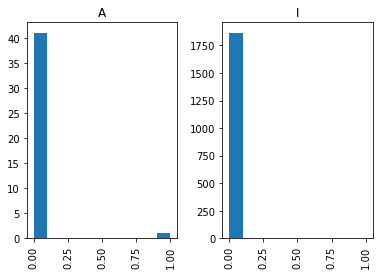

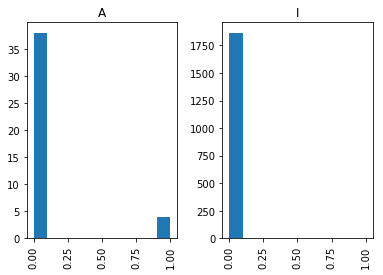

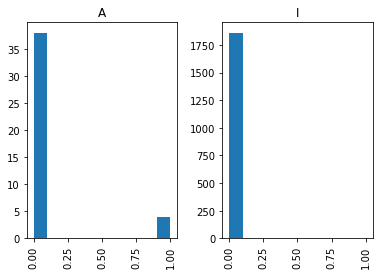

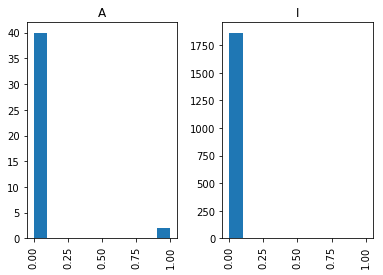

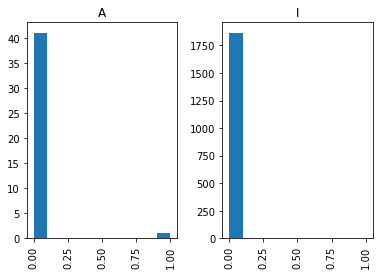

In [20]:
# %matplotlib inline

train_data['f1'].hist(by=train_data['activity'])
train_data['f2'].hist(by=train_data['activity'])
train_data['f3'].hist(by=train_data['activity'])
train_data['f4'].hist(by=train_data['activity'])
train_data['f5'].hist(by=train_data['activity'])


In [15]:
X_train.describe

<bound method NDFrame.describe of       f1  f2  f3  f4  f5  f6  f7  f8  f9  f10   ...     f139341  f139342  \
198    0   0   0   0   0   0   0   0   0    0   ...           0        0   
460    0   0   0   0   0   0   0   0   0    0   ...           0        0   
159    0   0   0   0   0   0   0   0   0    0   ...           0        0   
961    0   0   0   0   0   0   0   0   0    0   ...           0        0   
1641   0   0   0   0   0   0   0   0   0    0   ...           0        1   
1194   0   0   0   0   0   0   0   0   0    0   ...           0        0   
1589   0   0   0   0   0   0   0   0   0    0   ...           0        0   
83     0   0   0   0   0   0   0   0   0    0   ...           0        0   
628    0   0   0   0   0   0   0   0   0    0   ...           0        0   
1386   0   0   0   0   0   0   0   0   0    0   ...           0        0   
1457   0   0   0   0   0   0   0   0   0    0   ...           0        0   
948    0   0   0   0   0   0   0   0   0    0   ...   

## Applying PCA on the Train dataset

In [11]:
from sklearn import decomposition
from sklearn.decomposition import PCA

PCA = PCA(n_components = 1000)

X = train_data

X_new = PCA.fit(X)


## Verifying the PCA components

In [12]:
X_new.n_components_

1000

## PCA Plots

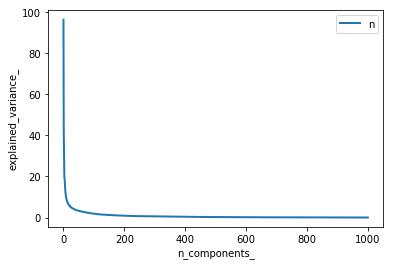

In [13]:
plt.plot(PCA.explained_variance_,linewidth = 2)
plt.xlabel('n_components_')
plt.ylabel('explained_variance_')
plt.legend('n_components')
plt.show()



## Handling Class Imbalance

In [34]:
import imblearn
from imblearn.over_sampling import SMOTE

Y_train[Y_train=='I']=0
Y_train[Y_train=='A']=1

sm = SMOTE(random_state=12, ratio=1.0)
X_res,Y_res = sm.fit_sample(X_train,Y_train)

print('Resampled dataset shape {}'.format(X_res.shape))
print('Resampled dataset shape {}'.format(Y_res.shape))


C:\Users\suneelnair1\Anaconda3\lib\site-packages\imblearn\utils\validation.py:77: UserWarning: 'y' should be of types ('binary', 'multiclass') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
C:\Users\suneelnair1\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Resampled dataset shape (2612, 139350)
Resampled dataset shape (2612,)


In [35]:
X_res = pd.DataFrame(X_res)

X = X_res.iloc[:,:-1]
Y = Y_res


## Test and train split after using SMOTE

In [36]:
from sklearn.model_selection import train_test_split

X_train_res, X_test_res,Y_train_res,Y_test_res = train_test_split(X,Y,test_size = 0.30, random_state=1)

In [36]:
Y_train_res = pd.DataFrame(Y_train_res)
#Y_test_res = pd.DataFrame(Y_test_res)
#Y_train_res
pd.value_counts(Y_train_res[0].values,sort=False)

0    918
1    910
dtype: int64

## Building a Random Forest model on the SMOTE dataset

In [22]:
from sklearn.ensemble import RandomForestClassifier

y_train_res = np.array(Y_train_res)
y_train_res[y_train_res=='I'] = 0
y_train_res[y_train_res=='A'] = 1
y_train_res = y_train_res.astype(int)

y_test_res = np.array(Y_test_res)
model_res_rf = RandomForestClassifier()
model_res_rf.fit(X_train_res,y_train_res)

C:\Users\suneelnair1\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions for the Random Forest model after using SMOTE

In [23]:
preds_rf_res = model_res_rf.predict(X_test_res)

## Metrics for the SMOTE model

In [24]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,classification_report,confusion_matrix

y_test_res = np.array(Y_test_res)
y_test_res[y_test_res=='I'] = 0
y_test_res[y_test_res=='A'] = 1
y_test_res = y_test_res.astype(int)

print('\nClassification Report: \n',classification_report(y_test_res,preds_rf_res))
print('\nConfusion Matrix: \n',confusion_matrix(y_test_res,preds_rf_res))

print('\nAccuracy: ',accuracy_score(y_test_res,preds_rf_res))


Classification Report: 
              precision    recall  f1-score   support

          0       0.99      1.00      0.99       388
          1       1.00      0.99      0.99       396

avg / total       0.99      0.99      0.99       784


Confusion Matrix: 
 [[387   1]
 [  3 393]]

Accuracy:  0.994897959184


## Building a Neural network model after using SMOTE on the dataset

In [26]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.optimizers import Adam

# Build model
 
model = Sequential()
model.add(Dense(12, activation='relu',input_shape=(139349,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

 
# Compile model
 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X = np.array(X_train_res)
Y = np.array(Y_train_res)

Y[Y=='N'] = 0
Y[Y=='Y'] = 1

hist=model.fit(X,Y,epochs = 5, batch_size=32, verbose=1)



Using TensorFlow backend.


Epoch 1/5
1828/1828 [==============================] - 21s - loss: 0.3088 - acc: 0.9431    
Epoch 2/5
1828/1828 [==============================] - 7s - loss: 0.1100 - acc: 0.9967     
Epoch 3/5
1828/1828 [==============================] - 7s - loss: 0.0720 - acc: 0.9973     
Epoch 4/5
1828/1828 [==============================] - 7s - loss: 0.0509 - acc: 0.9978     
Epoch 5/5
1828/1828 [==============================] - 7s - loss: 0.0371 - acc: 0.9973     


## Metrics for the Neural Network model after using SMOTE

In [32]:
train_score_res,train_acc_res=model.evaluate(X,Y)
print('\nTrain score',train_score_res)
print('\nTrain accuracy',train_acc_res)

1824/1828 [============================>.] - ETA: 0s E
Train score 0.0171105700812

Train accuracy 0.997811816193


In [33]:
x_test_res=np.array(X_test_res)
y_test_res=np.array(Y_test_res)

y_test_res[y_test_res=='I'] = 0
y_test_res[y_test_res=='A'] = 1

test_score_res,test_acc_res=model.evaluate(x_test_res,y_test_res)
print('\nTest Loss',test_score_res)
print('\nTest Accuracy',test_acc_res)

784/784 [==============================] - 3s     

Test Loss 0.0469883321499

Test Accuracy 0.994897959184


## Plotting the Loss function

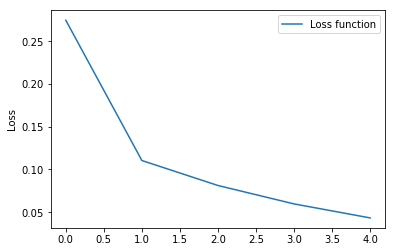

Test Loss 0.0469883321499


In [54]:
plt.plot(hist.history['loss'],label='Loss function')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('Test Loss',test_score_res)

## Building a Naive Bayes model on the SMOTE dataset

In [36]:
from sklearn.naive_bayes import GaussianNB

Y_train_res[Y_train_res==0]='N'
Y_train_res[Y_train_res==1]='Y'

model_NB_res = GaussianNB()
model_NB_res.fit(X_train_res,Y_train_res)
model_NB_res.score

C:\Users\suneelnair1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method ClassifierMixin.score of GaussianNB(priors=None)>

## Predictions for Naive Bayes model on the SMOTE dataset

In [38]:
predictions_NB_res = model_NB_res.predict(X_test_res)

Y_test_res[Y_test_res==0]='N'
Y_test_res[Y_test_res==1]='Y'

# Calculating the metrics

print('\nClassification Report:\n',classification_report(Y_test_res,predictions_NB_res))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test_res,predictions_NB_res))

print('\n Accuracy: ', accuracy_score(Y_test_res,predictions_NB_res))


Classification Report:
              precision    recall  f1-score   support

          N       1.00      0.94      0.97       388
          Y       0.94      1.00      0.97       396

avg / total       0.97      0.97      0.97       784


Confusion Matrix:
 [[364  24]
 [  1 395]]

 Accuracy:  0.968112244898


## Building an SVM model on the dataset after using SMOTE

In [40]:
from sklearn import svm

C=0.0001
X = X_train_res
Y = Y_train_res

SVM_model_res = svm.SVC(kernel='linear', C=C)

SVM_model_res.fit(X,Y)

C:\Users\suneelnair1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
print(SVM_model_res.score(X,Y))

0.958971553611


## Predictions and metrics for the SVM model

In [42]:
preds_svm_res = SVM_model_res.predict(X_test_res)

print('\nClassification Report:\n',classification_report(Y_test_res,preds_svm_res))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test_res,preds_svm_res))

print('\n Accuracy: ', accuracy_score(Y_test_res,preds_svm_res))


Classification Report:
              precision    recall  f1-score   support

          N       0.91      0.99      0.94       388
          Y       0.99      0.90      0.94       396

avg / total       0.95      0.94      0.94       784


Confusion Matrix:
 [[383   5]
 [ 40 356]]

 Accuracy:  0.942602040816


In [52]:
Y_test_res[Y_test_res==0]='I'
Y_test_res[Y_test_res==1]='A'

## Logistic Regression model

In [49]:
from sklearn.linear_model import LogisticRegression

logit_model_res = LogisticRegression()
logit_model_res.fit(X_train_res,Y_train_res)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and metrics for the Logistic Regression model after using SMOTE on the dataset

In [53]:
train_predictions_res = logit_model_res.predict(X_train_res)
test_predictions_res = logit_model_res.predict(X_test_res)

print('\nClassification Report:\n',classification_report(Y_test_res,test_predictions_res))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test_res,test_predictions_res))

print('\n Accuracy: ', accuracy_score(Y_test_res,test_predictions_res))


Classification Report:
              precision    recall  f1-score   support

          A       0.98      0.97      0.97       396
          I       0.97      0.98      0.97       388

avg / total       0.97      0.97      0.97       784


Confusion Matrix:
 [[383  13]
 [  9 379]]

 Accuracy:  0.97193877551


## ROC Curve for Logistic Regression model

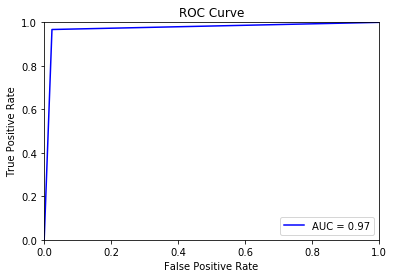

AUC: 0.971987920442


In [55]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_test_res = np.array(Y_test_res)

y_test_res[y_test_res=='I'] = 0
y_test_res[y_test_res=='A'] = 1
y_test_res = y_test_res.astype(int)

preds = np.array(test_predictions_res)

preds[preds=='I'] = 0
preds[preds=='A'] = 1
preds = preds.astype(int)

fpr,tpr,thresholds = metrics.roc_curve(y_test_res,preds)
 
roc_auc = metrics.auc(fpr,tpr)
 
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC:',roc_auc)

## Decision trees model after using SMOTE on the dataset

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtree_res = DecisionTreeClassifier()
dtree_res.fit(X_train_res,Y_train_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and metrics for the Decision Tree model

In [48]:
preds_dtree_res = dtree_res.predict(X_test_res)

print('\nClassification Report:\n',classification_report(Y_test_res,preds_dtree_res))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test_res,preds_dtree_res))

print('\nAccuracy: ',accuracy_score(Y_test_res,preds_dtree_res))


Classification Report:
              precision    recall  f1-score   support

          N       0.99      0.99      0.99       388
          Y       0.99      0.99      0.99       396

avg / total       0.99      0.99      0.99       784


Confusion Matrix:
 [[383   5]
 [  5 391]]

Accuracy:  0.987244897959


## Building a linear SVM Model on Train set

In [60]:
from sklearn import svm

C=0.0001

SVM_model = svm.SVC(kernel='linear', C=C)

Y_train[Y_train==0] = 'I'
Y_train[Y_train==1] = 'A'

X = X_train
Y = Y_train

SVM_model.fit(X,Y)

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
print(SVM_model.score(X,Y))


0.987265917603


In [35]:
X_val.drop(['activity'],axis =1, inplace = True)
print(SVM_model.score(X_val,Y_val))


0.980802792321


In [62]:
predictions_val_SVM = SVM_model.predict(X_val)

## SVM Plots

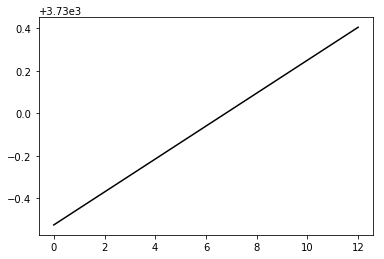

In [40]:
w = SVM_model.coef_[0]

# print(w)

a = -w[0]/w[1]

x1 = np.linspace(0,12)
y1 = a*x1 - SVM_model.intercept_[0]/w[1]

h0 = plt.plot(x1,y1,'k-',label='Non weighted div')



C:\Users\suneelnair1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


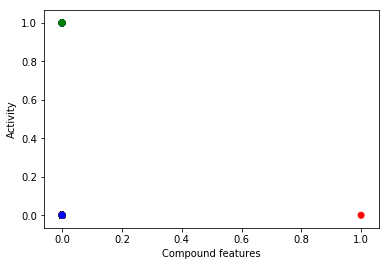

In [41]:
x_train = np.array(X_train)
y_train = np.array(Y_train)

y_train[y_train=='I'] = 0
y_train[y_train=='A'] = 1

N = 10
colors = ['R','G','B']

#plt.scatter(x_train[:,0],x_train[:,1],c = colors)
plt.scatter(x_train[:,0],y_train,c = colors)
plt.xlabel("Compound features")
plt.ylabel("Activity")
plt.legend()
plt.show()

## ROC Curve for SVM model

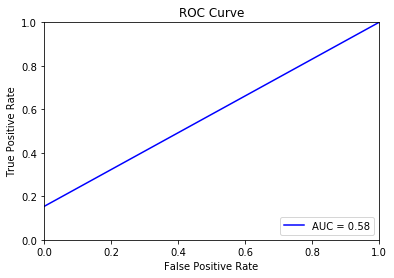

AUC: 0.576923076923


In [63]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_val = np.array(Y_val)

y_val[y_val=='I'] = 0
y_val[y_val=='A'] = 1
y_val = y_val.astype(int)

preds = np.array(predictions_val_SVM)

preds[preds=='I'] = 0
preds[preds=='A'] = 1
preds = preds.astype(int)

fpr,tpr,thresholds = metrics.roc_curve(y_val,preds)
 
roc_auc = metrics.auc(fpr,tpr)
 
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC:',roc_auc)

In [79]:
y_val.yval = y_val.yval.astype('category')

In [81]:
y_val.yval.value_counts()

0    560
1     13
Name: yval, dtype: int64

In [84]:
preds.pred = preds.pred.astype('category')

In [85]:
preds.pred.value_counts()

0    561
1     12
Name: pred, dtype: int64

## Metrics for the SVM model

In [69]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,classification_report,confusion_matrix

print('\nClassification Report\n',classification_report(Y_val,predictions))
print('\nConfusion Matrix\n',confusion_matrix(Y_val,predictions))

print('\nAccuracy: ', accuracy_score(Y_val,predictions))


Classification Report
              precision    recall  f1-score   support

          A       0.75      0.69      0.72        13
          I       0.99      0.99      0.99       560

avg / total       0.99      0.99      0.99       573


Confusion Matrix
 [[  9   4]
 [  3 557]]

Accuracy:  0.987783595113


## Metrics for the SVM model after using SMOTE

In [90]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,classification_report,confusion_matrix

print('\nClassification Report\n',classification_report(y_res,predictions_res))
print('\nConfusion Matrix\n',confusion_matrix(y_res,predictions_res))

print('\nAccuracy: ', accuracy_score(y_res,predictions_res))


Classification Report
              precision    recall  f1-score   support

          0       0.93      1.00      0.96      1306
          1       1.00      0.92      0.96      1306

avg / total       0.96      0.96      0.96      2612


Confusion Matrix
 [[1303    3]
 [ 104 1202]]

Accuracy:  0.959035222052


In [74]:
Y_train[Y_train==0] = 'I'
Y_train[Y_train==1] = 'A'

## Naive Bayes Classifier

In [71]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train,Y_train)
model_NB.score

<bound method ClassifierMixin.score of GaussianNB(priors=None)>

## Predictions and metrics for Naive Bayes model

In [75]:
predictions_NB = model_NB.predict(X_val)

# Calculating the metrics for the Naive Bayes model

print('\nClassification Report:\n',classification_report(Y_val,predictions_NB))
print('\nConfusion Matrix:\n',confusion_matrix(Y_val,predictions_NB))

print('\n Accuracy: ', accuracy_score(Y_val,predictions_NB))


Classification Report:
              precision    recall  f1-score   support

          A       0.29      0.62      0.39        13
          I       0.99      0.96      0.98       560

avg / total       0.97      0.96      0.96       573


Confusion Matrix:
 [[  8   5]
 [ 20 540]]

 Accuracy:  0.956369982548


## Plots for Naive Bayes model

C:\Users\suneelnair1\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(-0.061616150825943877,
 1.0616161508259436,
 -0.06788579514590698,
 1.0678857951459069)

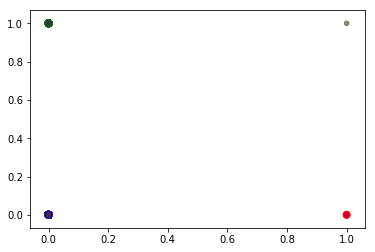

In [47]:
from sklearn import cross_validation
#from matplotlib.colors import ListedColorMap

#model_NaiveBayes_CV = cross_validation.cross_val_score(model_NB,X_train,Y_train,cv=5)
#model_NaiveBayes_CV
#plt.title('Naive Bayes model')
#plt.plot(model_NaiveBayes_CV,"p")
#plt.xlabel('X values')
#plt.ylabel('Probabilities')
#plt.legend()
#plt.show()

x=np.array(X_train)
y=np.array(Y_train)
x_val = np.array(X_val)
y_val = np.array(Y_val)
y_val[y_val=='I'] = 0
y_val[y_val=='A'] = 1

y[y=='I'] = 0
y[y=='A'] = 1

preds_NB=np.array(predictions_NB)
preds_NB[preds_NB=='I'] = 0
preds_NB[preds_NB=='A'] = 1

colors = ['R','G','B']
plt.scatter(x[:,0],y,c=colors, s=50,cmap='RdBu')
lim = plt.axis()
plt.scatter(y_val,preds_NB,c=colors,s=20,cmap='RdBu', alpha=0.1)
plt.axis(lim)




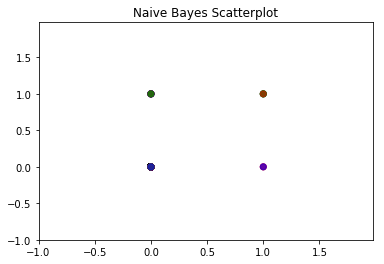

In [52]:
h = 0.02

x_val=np.array(X_val)

x_min,x_max = x_val[:,0].min() - 1,x_val[:,0].max() + 1
y_min,y_max = x_val[:,1].min() - 1,x_val[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

plt.scatter(y_val,preds_NB,c=colors, alpha = 0.5)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Naive Bayes Scatterplot')
plt.show()

In [20]:
X_val.drop(['activity'],axis=1,inplace=True)


C:\Users\suneelnair1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Logistic Regression model

In [13]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()



In [17]:
logit_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Train and Validation predictions

In [21]:
train_predictions = logit_model.predict(X_train)
val_predictions = logit_model.predict(X_val)

## Metrics for the Logistic Regression model

In [22]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,classification_report,confusion_matrix

print('\nClassification Report:\n',classification_report(Y_val,val_predictions))
print('\nConfusion Matrix:\n',confusion_matrix(Y_val,val_predictions))

print('\n Accuracy: ', accuracy_score(Y_val,val_predictions))


Classification Report:
              precision    recall  f1-score   support

          A       1.00      0.54      0.70        13
          I       0.99      1.00      0.99       560

avg / total       0.99      0.99      0.99       573


Confusion Matrix:
 [[  7   6]
 [  0 560]]

 Accuracy:  0.989528795812


In [29]:
type(val_predictions)

numpy.ndarray

## ROC Curve for Logistic Regression model

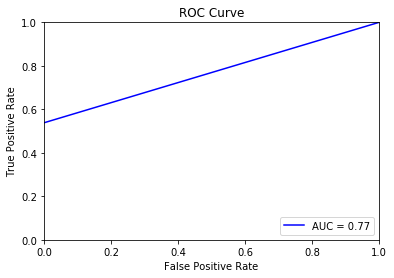

AUC: 0.769230769231


In [33]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_val = np.array(Y_val)

y_val[y_val=='I'] = 0
y_val[y_val=='A'] = 1
y_val = y_val.astype(int)

preds = np.array(val_predictions)

preds[preds=='I'] = 0
preds[preds=='A'] = 1
preds = preds.astype(int)

fpr,tpr,thresholds = metrics.roc_curve(y_val,preds)
 
roc_auc = metrics.auc(fpr,tpr)
 
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC:',roc_auc)




## Neural Network model for classification

In [65]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.optimizers import Adam

opt=Adam(lr=0.1)

# Build model
 
model = Sequential()
model.add(Dense(12, activation='relu',input_shape=(139350,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

 
# Compile model
 
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])


X = np.array(X_train)
Y = np.array(Y_train)

Y[Y=='I'] = 0
Y[Y=='A'] = 1

hist=model.fit(X,Y,epochs = 5, batch_size=10, verbose=1)


Using TensorFlow backend.


Epoch 1/5
1335/1335 [==============================] - 11s - loss: 0.3524 - acc: 0.9760    
Epoch 2/5
1335/1335 [==============================] - 8s - loss: 0.3501 - acc: 0.9783     
Epoch 3/5
1335/1335 [==============================] - 8s - loss: 0.3501 - acc: 0.9783     
Epoch 4/5
1335/1335 [==============================] - 8s - loss: 0.3501 - acc: 0.9783     
Epoch 5/5
1335/1335 [==============================] - 8s - loss: 0.3501 - acc: 0.9783     


## Metrics for the Neural Network model

In [66]:
score,acc=model.evaluate(X,Y)
print('\nTrain score',score)
print('\nTrain accuracy',acc)


1335/1335 [==============================] - 4s     

Train score 0.35013098138

Train accuracy 0.978277153737


In [67]:
x_val=np.array(X_val)
y_val=np.array(Y_val)

y_val[y_val=='I'] = 0
y_val[y_val=='A'] = 1

val_score,val_acc=model.evaluate(x_val,y_val)
print('\nValidation Loss',val_score)
print('\nValidation Accuracy',val_acc)


573/573 [==============================] - 2s     

Validation Loss 0.365681114877

Validation Accuracy 0.977312390925


## Plotting the Loss function

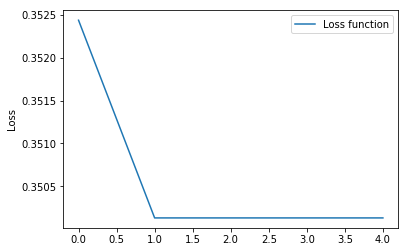

In [68]:
plt.plot(hist.history['loss'],label='Loss function')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Decision trees model

In [67]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Predictions and metrics for the Decision Tree model

In [68]:
preds_dtree = dtree.predict(X_val)

print('\nClassification Report:\n',classification_report(Y_val,preds_dtree))
print('\nConfusion Matrix:\n',confusion_matrix(Y_val,preds_dtree))

print('\n Accuracy: ', accuracy_score(Y_val,preds_dtree))





Classification Report:
              precision    recall  f1-score   support

          A       0.57      0.62      0.59        13
          I       0.99      0.99      0.99       560

avg / total       0.98      0.98      0.98       573


Confusion Matrix:
 [[  8   5]
 [  6 554]]

 Accuracy:  0.980802792321


## Plot for Decision Tree model

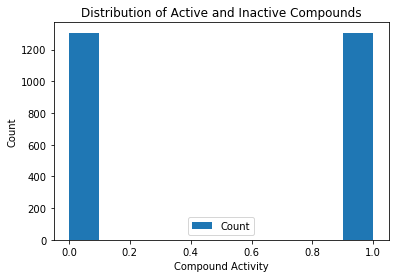

In [27]:
plt.hist(y_res,label='Count')
plt.title('Distribution of Active and Inactive Compounds')
plt.xlabel("Compound Activity")
plt.ylabel("Count")
plt.legend()
plt.show()

## Random forest algorithm

In [70]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train,Y_train)

C:\Users\suneelnair1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Predictions and metrics for the Random Forest model

In [71]:
preds_rf = model_rf.predict(X_val)

print('\nClassification Report:\n',classification_report(Y_val,preds_rf))
print('\nConfusion Matrix:\n',confusion_matrix(Y_val,preds_rf))

print('\n Accuracy: ', accuracy_score(Y_val,preds_rf))


Classification Report:
              precision    recall  f1-score   support

          A       0.89      0.62      0.73        13
          I       0.99      1.00      0.99       560

avg / total       0.99      0.99      0.99       573


Confusion Matrix:
 [[  8   5]
 [  1 559]]

 Accuracy:  0.989528795812


## Plot for different models and accuracies

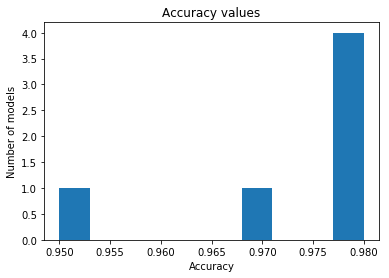

In [72]:
models =(1,2,3,4,5,6)

accuracies = (0.95,0.97,0.98,0.98,0.98,0.98)

models=np.array((models))
accuracies = np.array(accuracies)


#plt.plot(models,accuracies)
plt.hist(accuracies)
plt.title('Accuracy values')
#plt.title('1=Naive Bayes,2=Neural Network,3=SVM,4=Logistic Reg.,5=Decision Tree,6=Random Forest')
plt.xlabel('Accuracy')
plt.ylabel('Number of models')
#plt.legend('Acc',loc='lower right')
plt.show()

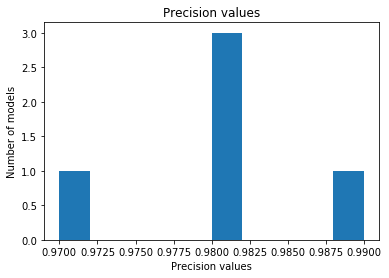

In [73]:
models =(1,2,3,4,5)

precisions = (0.98,0.97,0.99,0.98,0.98)

models=np.array((models))
precisions = np.array(precisions)


plt.hist(precisions)
plt.title('Precision values')
plt.xlabel('Precision values')
plt.ylabel('Number of models')
plt.show()

## Define X and Y for the test data

In [15]:
X = test_data.iloc[:,:-1]
Y = test_data.activity
y_train = Y[0:150]
y_train1 = Y[150:633]
y_train[y_train=='?']='A'
y_train1[y_train1=='?']='I'
frames = [y_train,y_train1]
Y = pd.concat(frames)

## Test and train split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state=1)



In [22]:
X_train.drop(['activity'],axis=1,inplace=True)

## Building all the models on Test data

## SVM model

In [23]:
X = X_train
Y = Y_train

from sklearn import svm

C=0.0001

SVM_model = svm.SVC(kernel='linear', C=C)

SVM_model.fit(X,Y)

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
SVM_model.score(X_train,Y_train)

0.77878103837471779

In [25]:
X_test.drop(['activity'],axis =1, inplace = True)

SVM_model.score(X_test,Y_test)

0.75789473684210529

## Predictions for SVM model

In [27]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,classification_report,confusion_matrix

preds_SVM = SVM_model.predict(X_test)

# Calculating the metrics for the SVM model

print('\nClassification Report:\n',classification_report(Y_test,preds_SVM))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,preds_SVM))

print('\n Accuracy: ', accuracy_score(Y_test,preds_SVM))


Classification Report:
              precision    recall  f1-score   support

          A       0.00      0.00      0.00        46
          I       0.76      1.00      0.86       144

avg / total       0.57      0.76      0.65       190


Confusion Matrix:
 [[  0  46]
 [  0 144]]

 Accuracy:  0.757894736842


C:\Users\suneelnair1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## ROC Curve for SVM model

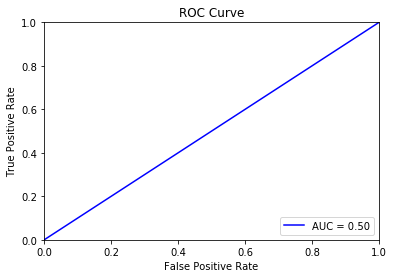

AUC: 0.5


In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_test = np.array(Y_test)
y_test[y_test=='I'] = 0
y_test[y_test=='A'] = 1


preds = np.array(preds_SVM)
preds[preds=='I'] = 0
preds[preds=='A'] = 1

fpr,tpr,thresholds = metrics.roc_curve(y_test,preds)
 
roc_auc = metrics.auc(fpr,tpr)
 
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC:',roc_auc)

## Naive Bayes Classifier on the Test data

In [166]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train,Y_train)
model_NB.score


<bound method ClassifierMixin.score of GaussianNB(priors=None)>

## Predictions for Naive Bayes model

In [167]:
predictions_NB = model_NB.predict(X_test)

# Calculating the metrics for the Naive Bayes model

print('\nClassification Report:\n',classification_report(Y_test,predictions_NB))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,predictions_NB))

print('\n Accuracy: ', accuracy_score(Y_test,predictions_NB))


Classification Report:
              precision    recall  f1-score   support

          A       0.00      0.00      0.00        46
          I       0.75      0.98      0.85       144

avg / total       0.57      0.74      0.65       190


Confusion Matrix:
 [[  0  46]
 [  3 141]]

 Accuracy:  0.742105263158


## Neural Network model for classification

In [34]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.optimizers import Adam

opt=Adam(lr=0.01)

# Build model
 
model = Sequential()
model.add(Dense(12, activation='relu',input_shape=(139350,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

 
# Compile model
 
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])


X = np.array(X_train)
Y = np.array(Y_train)

Y[Y=='I'] = 0
Y[Y=='A'] = 1

hist=model.fit(X,Y,epochs = 5, batch_size=10, verbose=1)

Epoch 1/5
443/443 [==============================] - 3s - loss: 3.7261 - acc: 0.7607     
Epoch 2/5
443/443 [==============================] - 2s - loss: 3.7961 - acc: 0.7607     
Epoch 3/5
443/443 [==============================] - 2s - loss: 3.7112 - acc: 0.7698     - ETA: 0s - loss: 3.7878 - acc: 0
Epoch 4/5
443/443 [==============================] - 2s - loss: 3.7112 - acc: 0.7698     
Epoch 5/5
443/443 [==============================] - 2s - loss: 3.7112 - acc: 0.7698     


## Metrics for Neural Network model

In [35]:
# Train accuracy

score=model.evaluate(X,Y)
print('\nTrain Loss',score[0])
print('\nTrain accuracy',score[1])

443/443 [==============================] - 1s     

Train Loss 3.71116418386

Train accuracy 0.769751691522


In [36]:
# Test Accuracy

x_test=np.array(X_test)
y_test=np.array(Y_test)

y_test[y_test=='I'] = 0
y_test[y_test=='A'] = 1

test_score=model.evaluate(x_test,y_test)

print('\nTest Loss',test_score[0])
print('\nTest Accuracy',test_score[1])

190/190 [==============================] - 0s     

Test Loss 3.84139801327

Test Accuracy 0.757894739352


## Logistic Regression model for Test data

In [41]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Train, Test predictions and Metrics for the Logistic Regression model

In [42]:
train_preds = model_lr.predict(X_train)
test_preds = model_lr.predict(X_test)


print('\nClassification Report:\n',classification_report(Y_test,test_preds))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,test_preds))

print('\n Accuracy: ', accuracy_score(Y_test,test_preds))


Classification Report:
              precision    recall  f1-score   support

          A       0.22      0.04      0.07        46
          I       0.76      0.95      0.84       144

avg / total       0.63      0.73      0.66       190


Confusion Matrix:
 [[  2  44]
 [  7 137]]

 Accuracy:  0.731578947368


## ROC Curve for Logistic Regression model

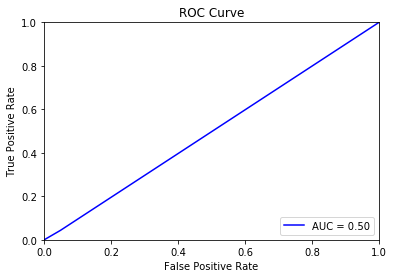

AUC: 0.497433574879


In [44]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_test = np.array(Y_test)
y_test[y_test=='I'] = 0
y_test[y_test=='A'] = 1


preds = np.array(test_preds)
preds[preds=='I'] = 0
preds[preds=='A'] = 1

fpr,tpr,thresholds = metrics.roc_curve(y_test,preds)
 
roc_auc = metrics.auc(fpr,tpr)
 
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('AUC:',roc_auc)

## Decision trees model

In [45]:
from sklearn.tree import DecisionTreeClassifier

dtree_test = DecisionTreeClassifier()
dtree_test.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Predictions and metrics for the Decision Tree model

In [46]:
preds_test_dtree = dtree_test.predict(X_test)

print('\nClassification Report:\n',classification_report(Y_test,preds_test_dtree))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,preds_test_dtree))

print('\n Accuracy: ', accuracy_score(Y_test,preds_test_dtree))


Classification Report:
              precision    recall  f1-score   support

          A       0.24      0.26      0.25        46
          I       0.76      0.74      0.75       144

avg / total       0.63      0.62      0.63       190


Confusion Matrix:
 [[ 12  34]
 [ 38 106]]

 Accuracy:  0.621052631579


## Plots for Decision Trees model

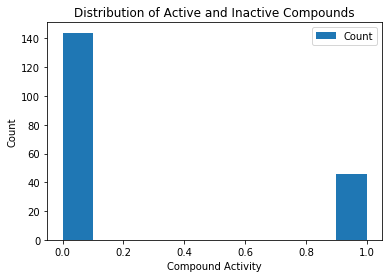

In [51]:
plt.hist(y_test,label='Count')
plt.title('Distribution of Active and Inactive Compounds')
plt.xlabel("Compound Activity")
plt.ylabel("Count")
plt.legend()
plt.show()

## Random forest algorithm

In [48]:
from sklearn.ensemble import RandomForestClassifier

model_test_rf = RandomForestClassifier()
model_test_rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Predictions and metrics for the Random Forest model

In [49]:
preds_test_rf = model_test_rf.predict(X_test)

print('\nClassification Report:\n',classification_report(Y_test,preds_test_rf))
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,preds_test_rf))

print('\n Accuracy: ', accuracy_score(Y_test,preds_test_rf))


Classification Report:
              precision    recall  f1-score   support

          A       0.32      0.13      0.18        46
          I       0.77      0.91      0.83       144

avg / total       0.66      0.72      0.68       190


Confusion Matrix:
 [[  6  40]
 [ 13 131]]

 Accuracy:  0.721052631579
